In [1]:
from utils import set_root

import pandas as pd
import numpy as np

import os
import seaborn as sns
import matplotlib.pyplot as plt

set_root()

Current working directory: /home/guido/shared/github/physioex-private


In [2]:
results_path = "models/multi-source-domain-1/"
combinations = list(range(0, 8))  # 0, 1

In [3]:
comb_results = {}
for combo in combinations:

    comb_results[combo] = []

    comb_dir = os.path.join(results_path, f"k={combo}")
    # take all the files in the directory or subdirectories which are named results.csv

    results = []
    for root, dirs, files in os.walk(comb_dir):
        for file in files:
            if str(file) == "results.csv":
                results.append(os.path.join(root, file))

    for result in results:

        result_df = pd.read_csv(result)
        # take only the test_results
        result_df = result_df[result_df["split"] == "test"]
        # remove datasets
        result_df = result_df.drop(columns=["split"])
        # result_df = pd.DataFrame(result_df).T

        comb_results[combo].append(result_df)

In [12]:
for comb_id in combinations:
    print(
        f"Accuracy k={comb_id} : {pd.concat( comb_results[comb_id] )['test_acc'].mean()}"
    )

Accuracy k=0 : 0.6846350133419037
Accuracy k=1 : 0.6827203914523124
Accuracy k=2 : 0.6805016717105581
Accuracy k=3 : 0.6666083220640818
Accuracy k=4 : 0.6783137508467132
Accuracy k=5 : 0.6841230001300573
Accuracy k=6 : 0.6778751254081726
Accuracy k=7 : nan


In [4]:
k_df = []
for comb_id in combinations:
    k_df.append(pd.concat(comb_results[comb_id]))
    k_df[-1]["k"] = comb_id

k_df = pd.concat(k_df)
k_df.head()

,test_loss,test_acc,test_f1,test_ck,test_pr,test_rc,dataset,k
0,2.044751,0.497741,0.416317,0.194368,0.458189,0.497741,hpap,0
1,0.682737,0.747647,0.737034,0.639921,0.762620,0.747647,mass,0
2,0.687709,0.763186,0.774035,0.619570,0.826044,0.763186,dcsm,0
3,0.979720,0.703931,0.672952,0.575948,0.728185,0.703931,sleep_edf,0
4,1.552825,0.588944,0.500275,0.464846,0.646470,0.588944,svuh,0


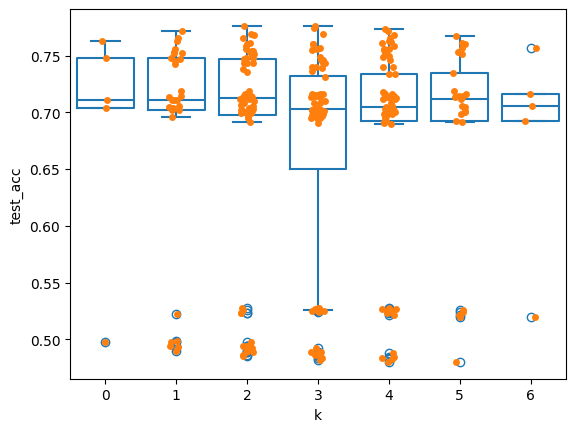

In [11]:
import seaborn as sns

plot_df = k_df[k_df["dataset"] != "isruc"]
plot_df = plot_df[plot_df["dataset"] != "svuh"]

sns.boxplot(data=plot_df, x="k", y="test_acc", fill=False)
sns.stripplot(data=plot_df, x="k", y="test_acc")
# display plot
plt.show()
plt.close()

In [14]:
plot_df["k"].unique()
plot_df[plot_df["k"] == 6]

,test_loss,test_acc,test_f1,test_ck,test_pr,test_rc,dataset,k
6,0.902583,0.705157,0.684115,0.607478,0.720079,0.705157,hmc,6
1,0.802359,0.716302,0.708582,0.604233,0.741681,0.716302,mass,6
0,1.820844,0.519410,0.453125,0.253842,0.514418,0.519410,hpap,6
3,1.060616,0.692088,0.657757,0.563971,0.716971,0.692088,sleep_edf,6
2,0.745547,0.756418,0.770648,0.620681,0.825934,0.756418,dcsm,6


<Axes: xlabel='dataset', ylabel='test_acc'>

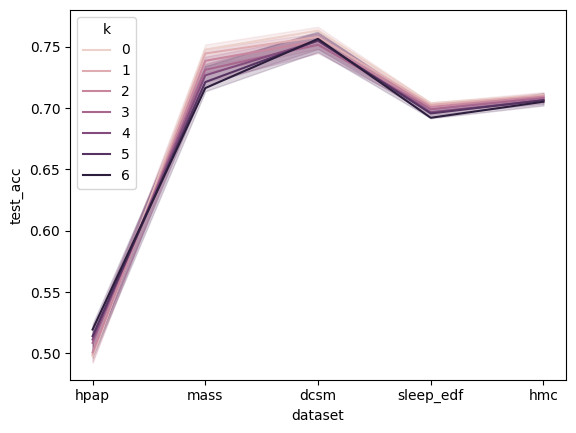

In [8]:
sns.lineplot(data=plot_df, x="dataset", y="test_acc", hue="k")